In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.16.1


In [6]:
# Get the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-11-26 11:35:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 142.251.184.207, 209.85.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: '101_food_classes_10_percent.zip'

101_food_classes_10 100%[===================>]   1.51G  93.8MB/s    in 16s     

2024-11-26 11:35:53 (98.3 MB/s) - '101_food_classes_10_percent.zip' saved [1625420029/1625420029]



In [7]:
!wget https://raw.githubusercontent.com/fx818/TensorFlow/refs/heads/main/extras/helper_functions.py

--2024-11-26 11:35:54--  https://raw.githubusercontent.com/fx818/TensorFlow/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-11-26 11:35:54 (60.0 MB/s) - 'helper_functions.py' saved [10246/10246]



In [8]:
from helper_functions import *

In [9]:
unzip_data("101_food_classes_10_percent.zip")

In [10]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/gyoza'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/poutine'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tacos'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hummus'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_quesadilla'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hot_and_sour_soup'.
There are 0 directories and 250 images in '101_fo

In [11]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

In [12]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE
                                                                )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                shuffle = False
                                                               )

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [13]:
# Data preprocessing

from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential


# Data augmentation
data_augmentation = Sequential([
    RandomFlip(mode='horizontal'),
    RandomRotation(0.2),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomZoom(0.2),
    Rescaling(1./255),
], name = 'data_augmentation')


In [50]:
# Building our model using Functional API
# Model 1
input = layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(input)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(101, activation = 'softmax', name = 'output_layer')(x)

customModel = tf.keras.Model(input, output)

customModel.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [51]:
customModel.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, None, None, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, None, None, 32) │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │         3,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,965 (269.39 KB)

 Trainable params: 68,965 (269.39 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history1 = customModel.fit(train_data,
                          epochs = 5,
                          validation_data = test_data,
                          validation_steps = int(.10*len(test_data))
                          )

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.0070 - loss: 4.6160 - val_accuracy: 0.0000e+00 - val_loss: 4.6144
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.0061 - loss: 4.6154 - val_accuracy: 0.0000e+00 - val_loss: 4.6144
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.0084 - loss: 4.6154 - val_accuracy: 0.0000e+00 - val_loss: 4.6155
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.0096 - loss: 4.6155 - val_accuracy: 0.0000e+00 - val_loss: 4.6155
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.0097 - loss: 4.6156 - val_accuracy: 0.0000e+00 - val_loss: 4.6146


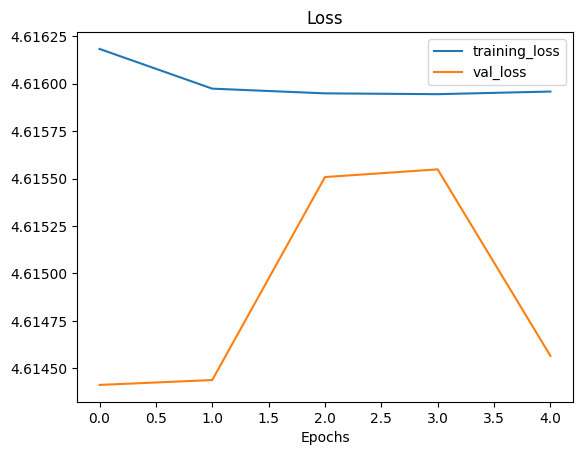

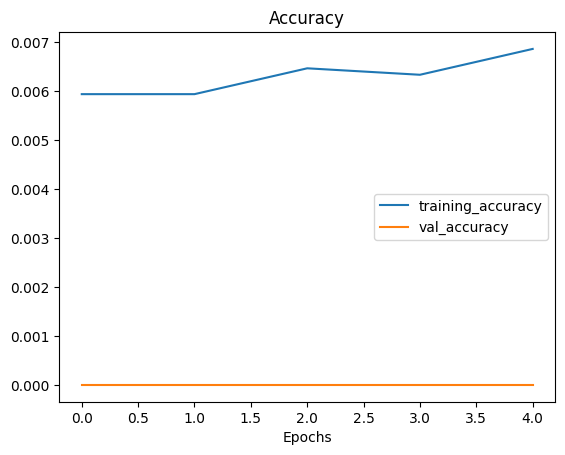

In [53]:
plot_loss_curves(history1)

In [54]:
res1 = customModel.evaluate(test_data)
res1

790/790 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.0106 - loss: 4.6151


[4.615120887756348, 0.009900989942252636]

In [13]:
# Model 2 using ResNet50
base_model = tf.keras.applications.ResNet50(include_top = False)
base_model.trainable = False

# Setting up model architecture with trainable top layer
input = layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(input)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name='global_avg_pool_2D')(x)
output = layers.Dense(101, activation='softmax', name='output_layer')(x)

customModel2 = tf.keras.Model(input, output)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
customModel2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, None, None,     │    23,587,712 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_2D              │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       206,949 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,794,661 (90.77 MB)

 Trainable params: 206,949 (808.39 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
# Compile the model
customModel2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [17]:
# Create a model checkpoint callback
checkpoint_path = "101_food_classes_10_percent_model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only = True,
                                                        monitor = "val_accuracy",
                                                        save_best_only = True
                                                        )

In [19]:
# Fitting the model (feature extracting)

initial_epochs = 5

history2 = customModel2.fit(
    train_data,
    epochs = initial_epochs,
    validation_data = test_data,
    # validation_steps = int(0.25*len(test_data)),
    callbacks = [checkpoint_callback]   
)

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 200s 843ms/step - accuracy: 0.0105 - loss: 4.8209 - val_accuracy: 0.0107 - val_loss: 4.6886
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 175s 742ms/step - accuracy: 0.0109 - loss: 4.7773 - val_accuracy: 0.0116 - val_loss: 4.6826
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 167s 705ms/step - accuracy: 0.0121 - loss: 4.7920 - val_accuracy: 0.0132 - val_loss: 4.6613
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 155s 657ms/step - accuracy: 0.0134 - loss: 4.7817 - val_accuracy: 0.0126 - val_loss: 4.6848
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 155s 657ms/step - accuracy: 0.0123 - loss: 4.7658 - val_accuracy: 0.0202 - val_loss: 4.6447


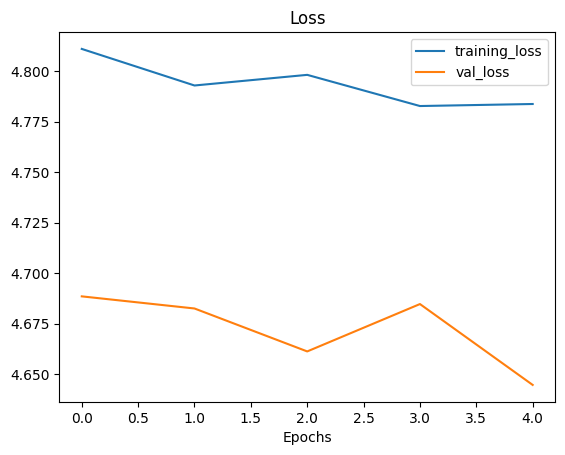

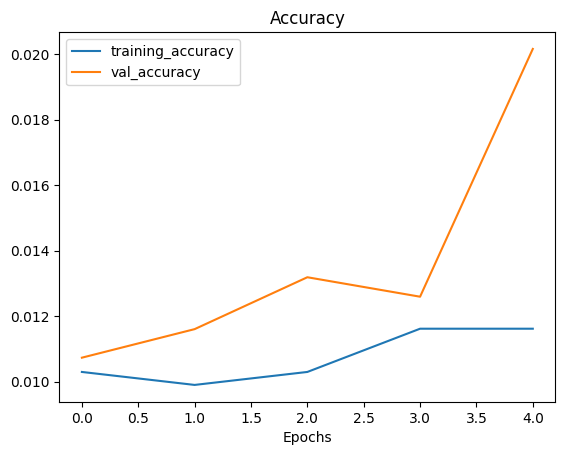

In [20]:
plot_loss_curves(history2)

In [21]:
res2 = customModel2.evaluate(test_data)
res2

790/790 ━━━━━━━━━━━━━━━━━━━━ 103s 130ms/step - accuracy: 0.0121 - loss: 4.6516


[4.644747257232666, 0.020158415660262108]

## Building model3 with `ResNet152V2`

In [14]:
# Model 2 using ResNet50
base_model = tf.keras.applications.ResNet152V2(include_top = False)
base_model.trainable = False

# Setting up model architecture with trainable top layer
input = layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(input)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name='global_avg_pool_2D')(x)
output = layers.Dense(101, activation='softmax', name='output_layer')(x)

customModel3 = tf.keras.Model(input, output)


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
customModel3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, None, None,     │    58,331,648 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_2D              │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       206,949 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,538,597 (223.31 MB)

 Trainable params: 206,949 (808.39 KB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [18]:
# Compile the model
customModel3.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

# Fitting the model (feature extracting)

initial_epochs = 5

history3 = customModel3.fit(
    train_data,
    epochs = initial_epochs,
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data)),
    callbacks = [checkpoint_callback]   
)


Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.0195 - loss: 4.8587 - val_accuracy: 0.0587 - val_loss: 4.2441
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 186s 782ms/step - accuracy: 0.1034 - loss: 4.0625 - val_accuracy: 0.2306 - val_loss: 3.3742
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 170s 714ms/step - accuracy: 0.1993 - loss: 3.5874 - val_accuracy: 0.3306 - val_loss: 2.8760
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 159s 671ms/step - accuracy: 0.2706 - loss: 3.2357 - val_accuracy: 0.2874 - val_loss: 2.9138
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.3066 - loss: 3.0085

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


237/237 ━━━━━━━━━━━━━━━━━━━━ 98s 415ms/step - accuracy: 0.3066 - loss: 3.0084 - val_accuracy: 0.5000 - val_loss: 2.2396


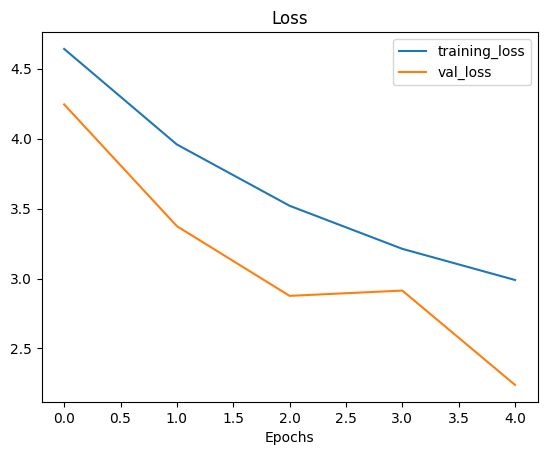

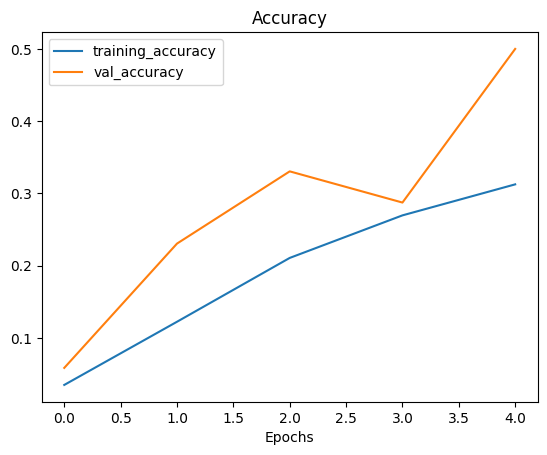

In [19]:
plot_loss_curves(history3)

In [20]:
res3 = customModel3.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 233s 295ms/step - accuracy: 0.3253 - loss: 2.8287


In [22]:
res3

[2.6686453819274902, 0.35417822003364563]

## Lets try `EfficientNetV2B0`

In [27]:
# Model 2 using ResNet50
base_model = tf.keras.applications.EfficientNetV2B0(include_top = False)
base_model.trainable = False

# Setting up model architecture with trainable top layer
input = layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(input)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name='global_avg_pool_2D')(x)
output = layers.Dense(101, activation='softmax', name='output_layer')(x)

customModel4 = tf.keras.Model(input, output)


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
customModel4.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_2D              │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,048,693 (23.07 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [29]:
# Compile the model
customModel4.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

# Fitting the model (feature extracting)

initial_epochs = 5

history4 = customModel4.fit(
    train_data,
    epochs = initial_epochs,
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data)),
    callbacks = [checkpoint_callback]   
)


Epoch 1/5


2024-11-26 08:11:31.206277: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_6_1/efficientnetv2-b0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


237/237 ━━━━━━━━━━━━━━━━━━━━ 102s 380ms/step - accuracy: 0.0097 - loss: 4.6584 - val_accuracy: 0.0000e+00 - val_loss: 4.6675
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 72s 305ms/step - accuracy: 0.0065 - loss: 4.6341 - val_accuracy: 0.0397 - val_loss: 4.6240
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 65s 273ms/step - accuracy: 0.0113 - loss: 4.6365 - val_accuracy: 0.0000e+00 - val_loss: 4.5854
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 45s 188ms/step - accuracy: 0.0132 - loss: 4.6312 - val_accuracy: 0.0000e+00 - val_loss: 4.6882


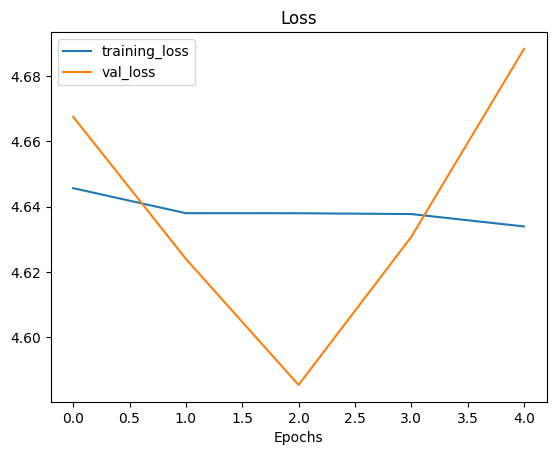

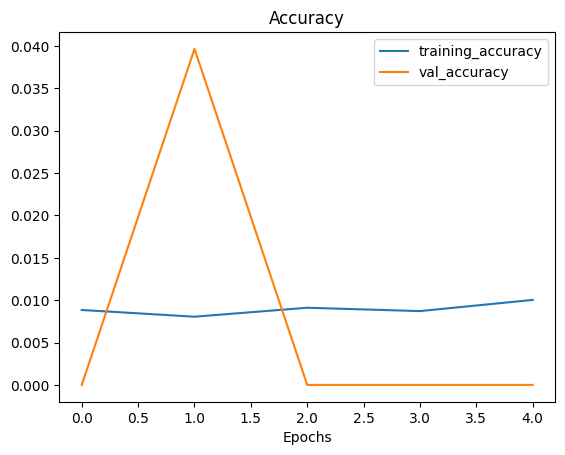

In [30]:
plot_loss_curves(history4)

In [31]:
customModel4.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.0091 - loss: 4.6389


[4.625735282897949, 0.009900989942252636]

## Trying for `ConvNeXtXLarge`

In [32]:
# Model 2 using ResNet50
base_model = tf.keras.applications.ConvNeXtXLarge(include_top = False)
base_model.trainable = False

# Setting up model architecture with trainable top layer
input = layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(input)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name='global_avg_pool_2D')(x)
output = layers.Dense(101, activation='softmax', name='output_layer')(x)

customModel5 = tf.keras.Model(input, output)


1393257616/1393257616 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [33]:
customModel5.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_xlarge (Functional)    │ (None, None, None,     │   348,147,968 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_2D              │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       206,949 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,354,917 (1.30 GB)

 Trainable params: 206,949 (808.39 KB)

 Non-trainable params: 348,147,968 (1.30 GB)

In [ ]:
# Compile the model
customModel5.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

# Fitting the model (feature extracting)

initial_epochs = 5

history5 = customModel5.fit(
    train_data,
    epochs = initial_epochs,
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data)),
    callbacks = [checkpoint_callback]   
)


Epoch 1/5


I0000 00:00:1732609241.345879     105 service.cc:145] XLA service 0x7abe3455e040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732609241.345927     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732609241.345931     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732609242.216280     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


237/237 ━━━━━━━━━━━━━━━━━━━━ 2535s 11s/step - accuracy: 0.0139 - loss: 4.8311 - val_accuracy: 0.0025 - val_loss: 4.6307
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 2476s 10s/step - accuracy: 0.0262 - loss: 4.5485 - val_accuracy: 0.1050 - val_loss: 4.4069
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 2420s 10s/step - accuracy: 0.0629 - loss: 4.4773 - val_accuracy: 0.1791 - val_loss: 4.2140
Epoch 4/5
 45/237 ━━━━━━━━━━━━━━━━━━━━ 18:09 6s/step - accuracy: 0.0800 - loss: 4.4166

In [ ]:
plot_loss_curves(history5)

In [ ]:
customModel5.evaluate(test_data)

## Finetuning our customModel3 trained on `ResNet152V2`


In [23]:
# Lets first load the model using the model checkpoint that we created
customModel3.load_weights(checkpoint_path)

# Now lets evaluate to verify that we have loaded the desired model
res_loaded = customModel3.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 232s 294ms/step - accuracy: 0.3253 - loss: 2.8287


In [24]:
res3, res_loaded

([2.6686453819274902, 0.35417822003364563],
 [2.6686453819274902, 0.35417822003364563])

In [25]:
# Additionally you can use numpy.isclose to find whether the above 2 results are close or not
import numpy as np
np.isclose(np.array(res3), np.array(res_loaded))

array([ True,  True])

In [26]:
customModel3.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=resnet152v2, built=True>,
 <GlobalAveragePooling2D name=global_avg_pool_2D, built=True>,
 <Dense name=output_layer, built=True>]

In [30]:
for i, layer in enumerate(customModel3.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_layer False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_

In [31]:
# How many trainable variable are in our base model
print(len(customModel3.layers[2].trainable_variables))

0


In [32]:
# to begin finetuning, lets start by setting the last 10 layers of our base_model.trainable to True
base_model.trainable = True

# Freeze all the layers except for the last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile our model everytime we make change
customModel3.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
    # When finetuning we wanna lower the lr by 10X
    metrics = ['accuracy']
)

In [33]:
customModel3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, None, None,     │    58,331,648 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_2D              │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       206,949 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,538,597 (223.31 MB)

 Trainable params: 3,623,013 (13.82 MB)

 Non-trainable params: 54,915,584 (209.49 MB)

In [35]:
# Check which layer are tunable (trainable)
for layer_number, layer in enumerate(customModel3.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_

In [36]:
# Now we have unfrozen some of the layers closer to the top
# Lets see how many of them are trainable
print(len(customModel3.trainable_variables))

11


In [39]:
# Lets finetune for another 5 epochs
finetune_epochs = initial_epochs + 5

# Refit the model same as model2 except with more trainable layers
finetuned_history3 = customModel3.fit(
    train_data,
    epochs = finetune_epochs,
    validation_data = test_data,
    # validation_steps = int(0.2*len(test_data)),
    initial_epoch = history3.epoch[-1], # finetune from prev last epochs
    # callbacks = [] # If you want any callbacks
)

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.4054 - loss: 2.6067 - val_accuracy: 0.4226 - val_loss: 2.3317
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.4290 - loss: 2.5564 - val_accuracy: 0.4283 - val_loss: 2.3027
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.4342 - loss: 2.4853 - val_accuracy: 0.4334 - val_loss: 2.2708
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.4440 - loss: 2.4443 - val_accuracy: 0.4384 - val_loss: 2.2511
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.4435 - loss: 2.4068 - val_accuracy: 0.4433 - val_loss: 2.2284
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.4596 - loss: 2.3426 - val_accuracy: 0.4469 - val_loss: 2.2110


In [40]:
finetuned_res = customModel3.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 233s 295ms/step - accuracy: 0.4161 - loss: 2.3913


In [41]:
res3, res_loaded, finetuned_res

([2.6686453819274902, 0.35417822003364563],
 [2.6686453819274902, 0.35417822003364563],
 [2.2109527587890625, 0.44689109921455383])

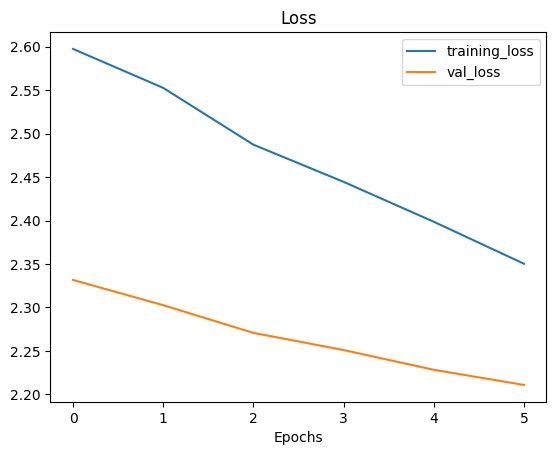

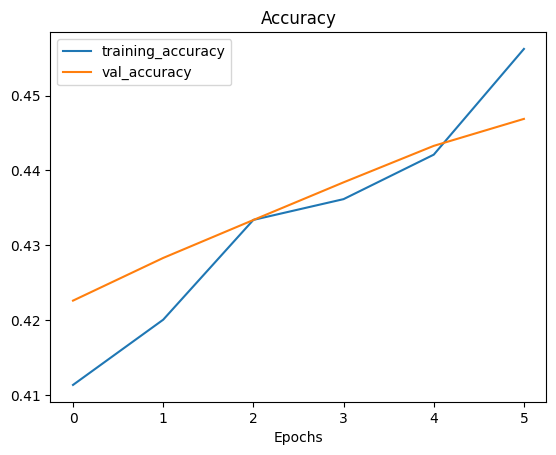

In [42]:
plot_loss_curves(finetuned_history3)

In [43]:
# Lets create a funcrion to compare training histories
import matplotlib.pyplot as plt

def compare_history(original_hist, new_hist, initial_epochs):
    """
    Compares the Tensorflow history objects
    """
    # Get original history measurements
    acc = original_hist.history['accuracy']
    loss = original_hist.history['loss']
    
    val_acc = original_hist.history['val_accuracy']
    val_loss = original_hist.history['val_loss']

    # Combine original history metrics with new_history metrics
    total_acc = acc + new_hist.history['accuracy']
    total_loss = loss + new_hist.history['loss']
    
    total_val_acc = val_acc + new_hist.history['val_accuracy']
    total_val_loss = val_loss + new_hist.history['val_loss']

    # make accuracy plots
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc, label = "Training Accuracy")
    plt.plot(total_val_acc, label = "Val Accuracy")
    plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="lower left")
    plt.title("Training and Validation Accuracy")

    # make loss plots
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,2)
    plt.plot(total_loss, label = "Training Loss")
    plt.plot(total_val_loss, label = "Val Loss")
    plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")



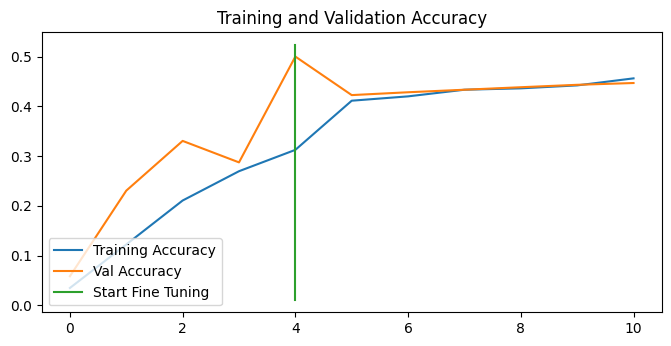

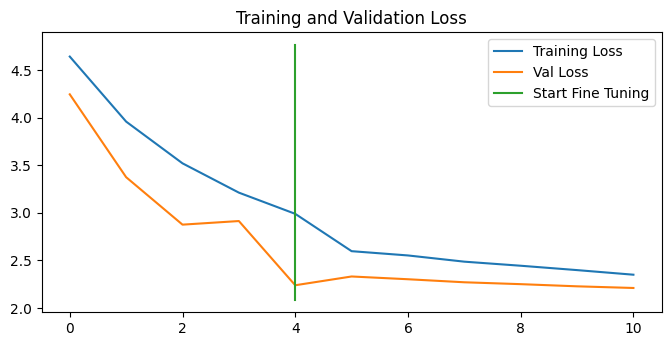

In [44]:
compare_history(history3, finetuned_history3, 5)

In [45]:
customModel3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, None, None,     │    58,331,648 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool_2D              │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       206,949 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,784,625 (250.95 MB)

 Trainable params: 3,623,013 (13.82 MB)

 Non-trainable params: 54,915,584 (209.49 MB)

 Optimizer params: 7,246,028 (27.64 MB)

In [46]:
!wget https://www.vegrecipesofindia.com/wp-content/uploads/2020/11/pizza-recipe.jpg

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-11-26 13:09:38--  https://www.vegrecipesofindia.com/wp-content/uploads/2020/11/pizza-recipe.jpg
Resolving www.vegrecipesofindia.com (www.vegrecipesofindia.com)... 104.18.4.29, 104.18.5.29, 2606:4700::6812:41d, ...
Connecting to www.vegrecipesofindia.com (www.vegrecipesofindia.com)|104.18.4.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 320838 (313K) [image/jpeg]
Saving to: 'pizza-recipe.jpg'

pizza-recipe.jpg    100%[===================>] 313.32K  --.-KB/s    in 0.03s   

2024-11-26 13:09:39 (9.92 MB/s) - 'pizza-recipe.jpg' saved [320838/320838]



In [49]:
path = "pizza-recipe.jpg"
# Lets view some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_image(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.title("Image")
    plt.axis('off');
    return img

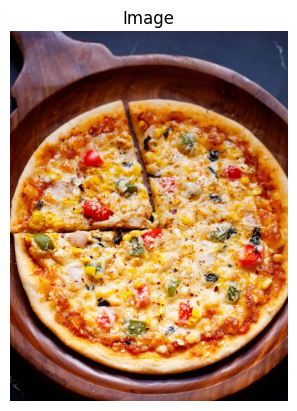

In [51]:
img = view_image(path)

In [56]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

path = "pizza-recipe.jpg"
img_resized = load_img(path, target_size=(224, 224))  # Resize image
img_array = img_to_array(img_resized)  # Convert to array
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


pred_res = customModel3.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [57]:
print(customModel3.input_shape)

(None, 224, 224, 3)


In [63]:
idx = pred_res.argmax()
train_data.class_names[idx]

'pizza'